***Importing all the necessary libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
upload=files.upload()

Saving bankruptcy-prevention.xlsx to bankruptcy-prevention.xlsx


***Importing and reading the file***

In [ ]:
data=pd.read_excel('bankruptcy-prevention.xlsx')
data

,industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class
0,0.5;1;0;0;0;0.5;bankruptcy
1,0;1;0;0;0;1;bankruptcy
2,1;0;0;0;0;1;bankruptcy
3,0.5;0;0;0.5;0;1;bankruptcy
4,1;1;0;0;0;1;bankruptcy
...,...
245,0;1;1;1;1;1;non-bankruptcy
246,1;1;0.5;1;1;0;non-bankruptcy
247,0;1;1;0.5;0.5;0;non-bankruptcy
248,1;0;0.5;1;0.5;0;non-bankruptcy


**Here we can see that we have 250 rows and only 1 column which consists of all the values which are separated by semi colon(;). So we will treat this in the further codes.**

In [ ]:
data=data.iloc[:,0].str.split(';',expand=True)
data.head()

,0,1,2,3,4,5,6
0,0.5,1,0,0,0,0.5,bankruptcy
1,0,1,0,0,0,1,bankruptcy
2,1,0,0,0,0,1,bankruptcy
3,0.5,0,0,0.5,0,1,bankruptcy
4,1,1,0,0,0,1,bankruptcy


In [ ]:
data.columns=['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk', 'class']
data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1,0,0,0,0.5,bankruptcy
1,0,1,0,0,0,1,bankruptcy
2,1,0,0,0,0,1,bankruptcy
3,0.5,0,0,0.5,0,1,bankruptcy
4,1,1,0,0,0,1,bankruptcy


# EDA

In [ ]:
data.dtypes

industrial_risk          object
management_risk          object
financial_flexibility    object
credibility              object
competitiveness          object
operating_risk           object
class                    object
dtype: object

**The dtypes of all the columns are in object type, we have to convert these object dtypes to float dtype so that we can perform analysis.**

In [ ]:
data['industrial_risk'] = pd.to_numeric(data['industrial_risk'], errors='coerce')
data['management_risk'] = pd.to_numeric(data['management_risk'], errors='coerce')
data['financial_flexibility'] = pd.to_numeric(data['financial_flexibility'], errors='coerce')
data['credibility'] = pd.to_numeric(data['credibility'], errors='coerce')
data['competitiveness'] = pd.to_numeric(data['competitiveness'], errors='coerce')
data['operating_risk'] = pd.to_numeric(data['operating_risk'], errors='coerce')


In [ ]:
data.dtypes

industrial_risk          float64
management_risk          float64
financial_flexibility    float64
credibility              float64
competitiveness          float64
operating_risk           float64
class                     object
dtype: object

In [ ]:
#Number of unique values present in each Column
data.nunique()

industrial_risk          3
management_risk          3
financial_flexibility    3
credibility              3
competitiveness          3
operating_risk           3
class                    2
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [ ]:
data.duplicated().sum()

147

***Null Value detection and treatment***

In [ ]:
data.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

**As we can see there are no null values**

In [ ]:
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data['class'].value_counts()

non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64

In [ ]:
data.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

**Visualization of data**

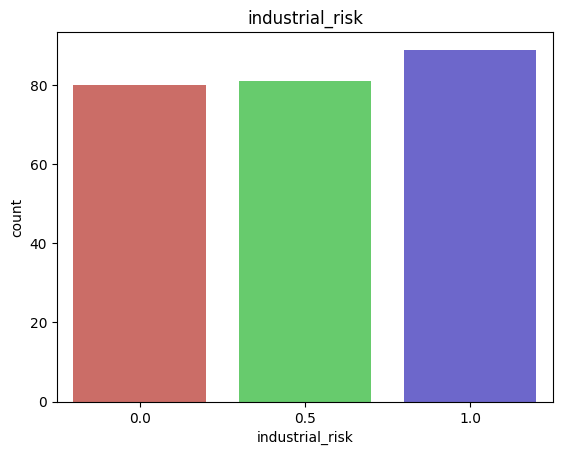

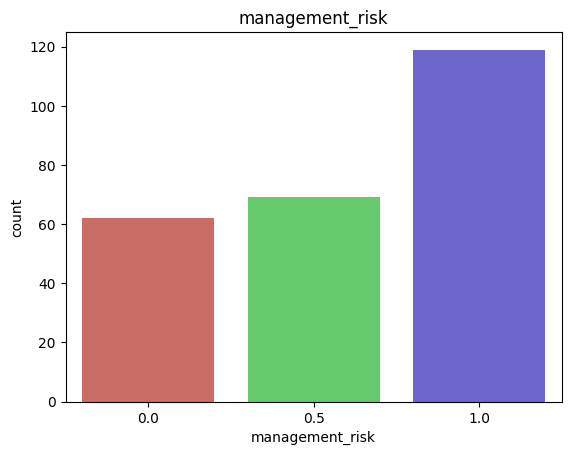

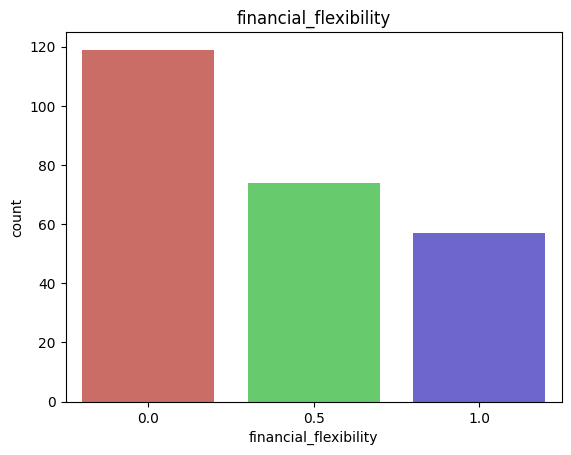

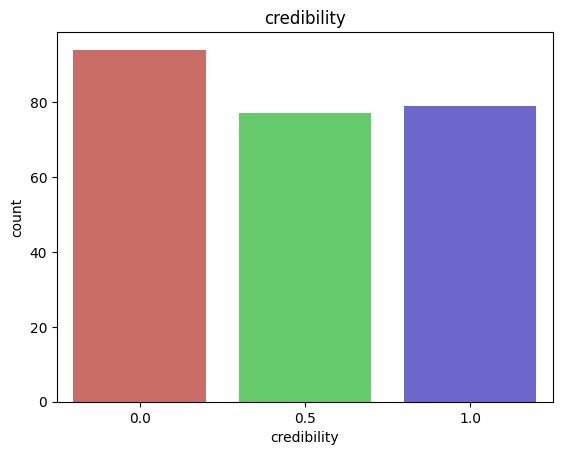

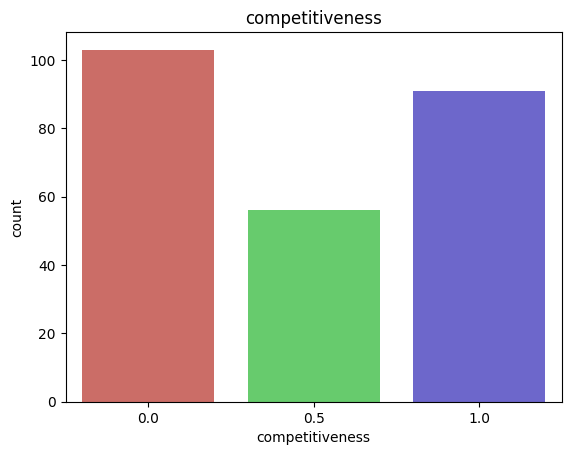

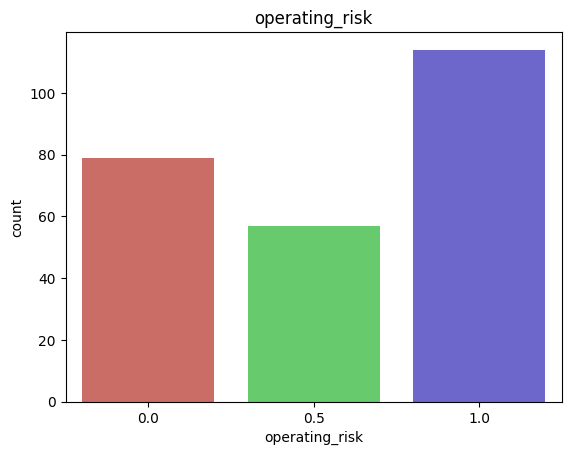

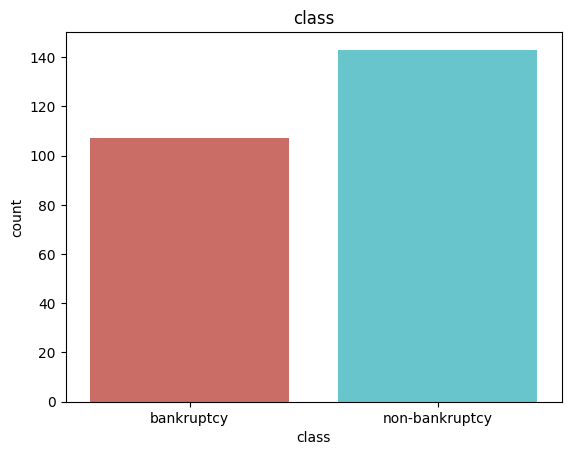

In [ ]:
for i in data.columns:
  sns.countplot(x=i,data=data, palette='hls')
  plt.title(i)
  plt.show()


***Outlier Detection using Boxplot***

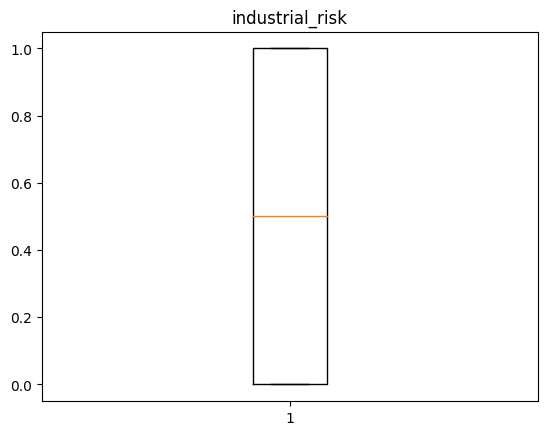

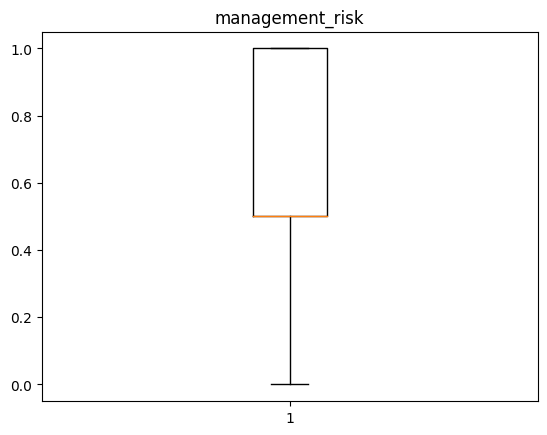

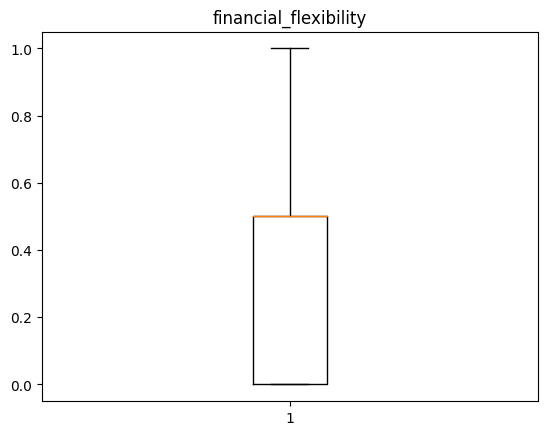

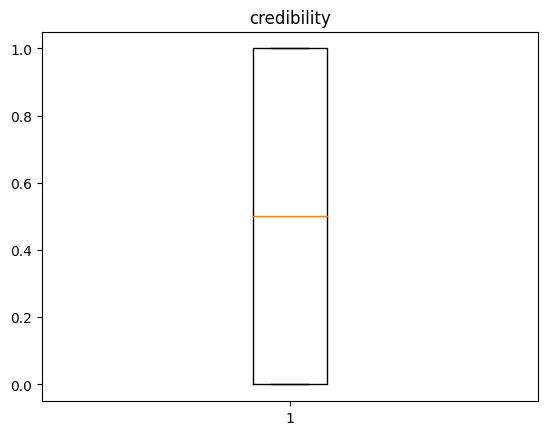

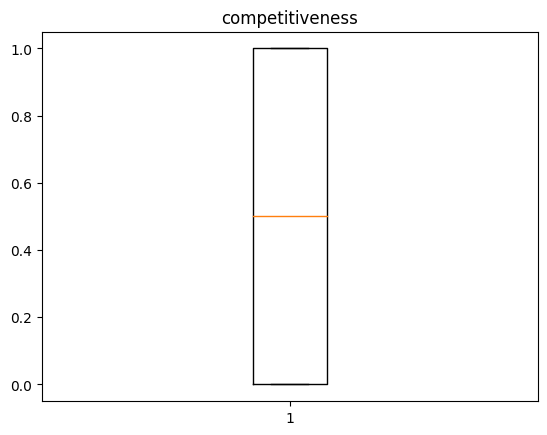

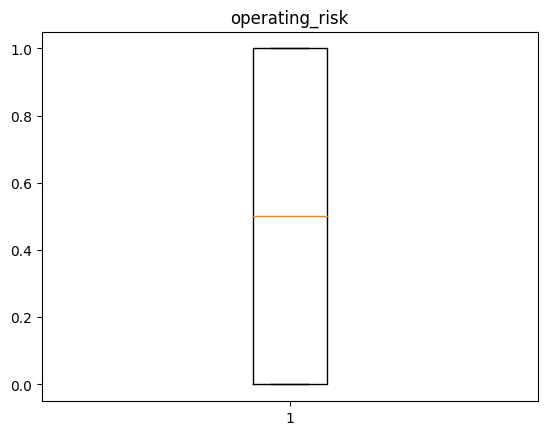

In [ ]:
for i in data.columns:
  if i=='class':
    pass
  else:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

**As we can see there are no outliers present in our data.**

In [ ]:
#Encoding

labelencoder=LabelEncoder()
data['class']=labelencoder.fit_transform(data['class'])

In [ ]:
print(data['class'].dtypes)
data['class'].value_counts()

int64


1    143
0    107
Name: class, dtype: int64

Here,

non-bankruptcy is 1

bankruptcy is 0     

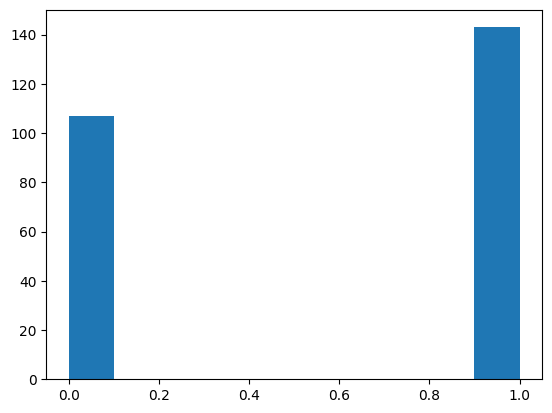

In [ ]:
plt.hist(data['class']);

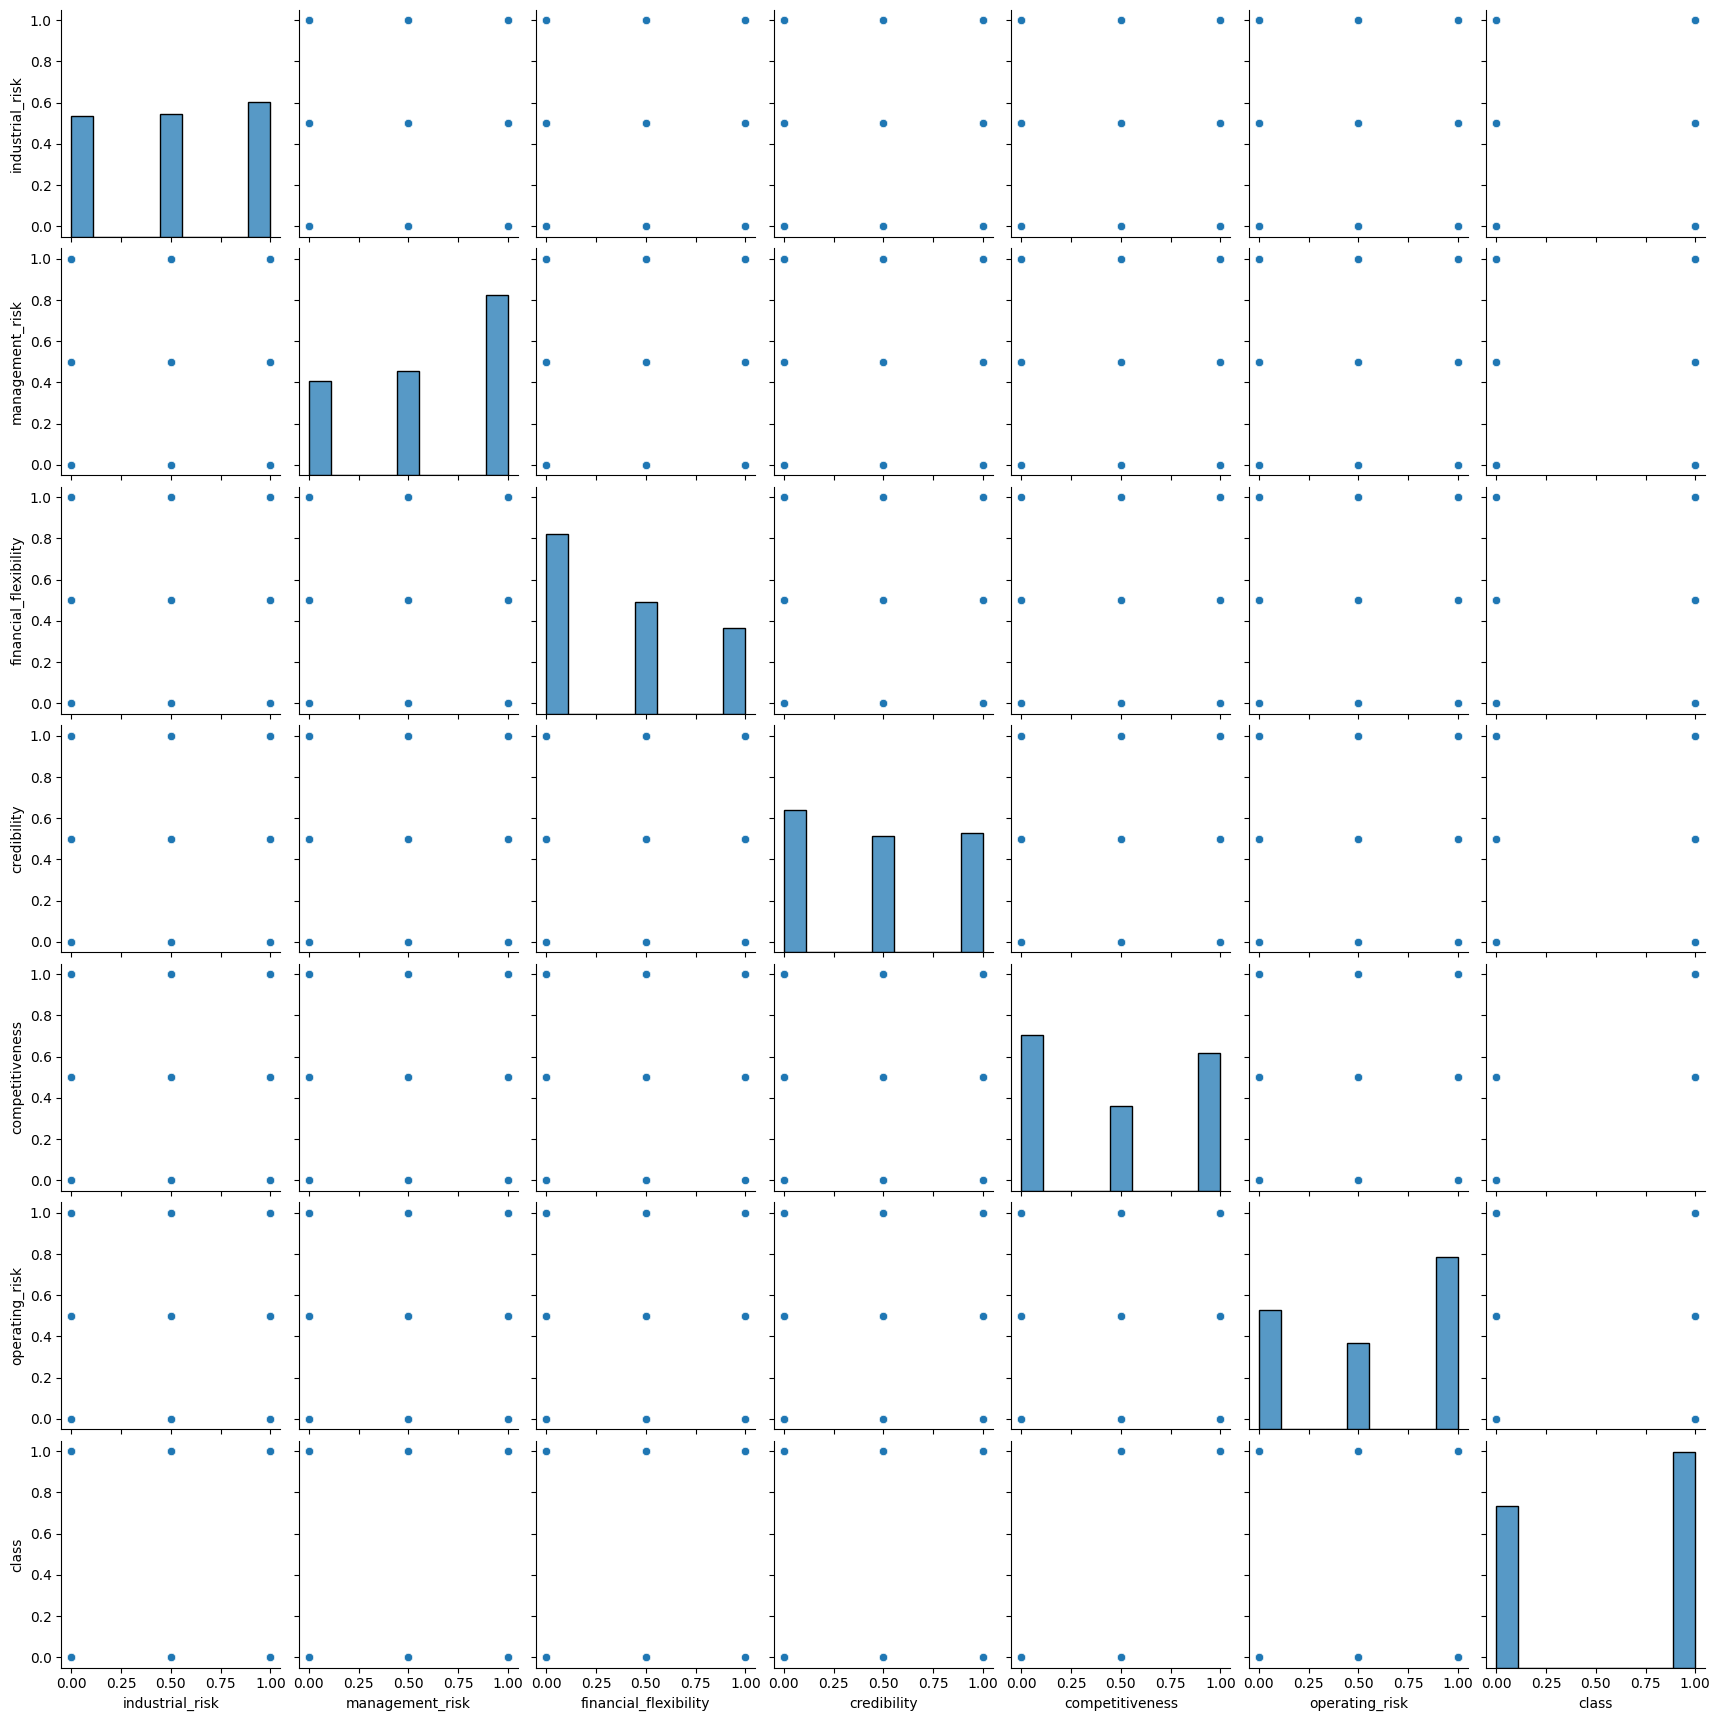

In [ ]:
sns.pairplot(data);

In [ ]:
data.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


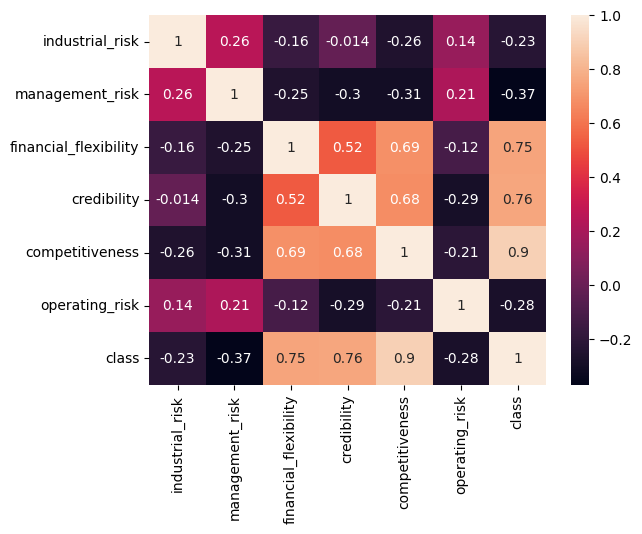

In [ ]:
sns.heatmap(data.corr(),annot=True);

***Splitting the data for training and testing purpose.***

In [ ]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(x.shape,y.shape)

(250, 6) (250,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 10)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(175, 6)
(75, 6)

(175,)
(75,)


***MODEL BUILDING***

**1) Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [ ]:
LR.coef_

array([[-0.54165147, -0.73191848,  2.25845039,  2.22512166,  3.62946775,
        -0.41094932]])

In [ ]:
y_pred_train = LR.predict(x_train)
print('Classification Report:','\n','\n',classification_report(y_train,y_pred_train))
print()
print('Confusion Matrix:','\n','\n',confusion_matrix(y_train,y_pred_train))

Classification Report: 
 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        73
           1       0.99      1.00      1.00       102

    accuracy                           0.99       175
   macro avg       1.00      0.99      0.99       175
weighted avg       0.99      0.99      0.99       175


Confusion Matrix: 
 
 [[ 72   1]
 [  0 102]]


In [ ]:
y_pred_test = LR.predict(x_test)
print('Classification Report:','\n','\n',classification_report(y_test, y_pred_test))
print()
print('Confusion Matrix:','\n','\n',confusion_matrix(y_test,y_pred_test))

Classification Report: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        41

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75


Confusion Matrix: 
 
 [[34  0]
 [ 0 41]]


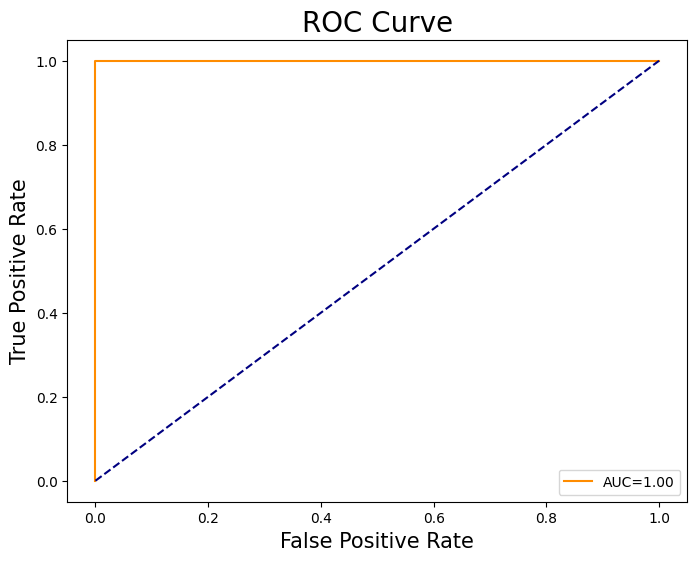

In [ ]:
# Plotting of ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_test)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='darkorange',label=f'AUC={roc_auc:.2f}')
plt.plot([0,1],[0,1], color='navy',linestyle='--')
plt.xlabel('False Positive Rate',size=15)
plt.ylabel('True Positive Rate',size=15)
plt.title('ROC Curve',size=20)
plt.legend()
plt.show()


Here we got AUC=1.0 which means perfect discrimination between both the classes.

In this model we got 99% accuracy in training phase and 100% accuracy in testing phase.

**2) Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In Decision Tree we can build the model using two criteria:

->GINI

->ENTROPY.

First we will use gini criteria.

In [ ]:
#Using GINI criteria
DT1 = DecisionTreeClassifier(criterion='gini', min_samples_split=3,max_depth=5)
DT1.fit(x_train,y_train)
DT1.score(x_train,y_train)

1.0

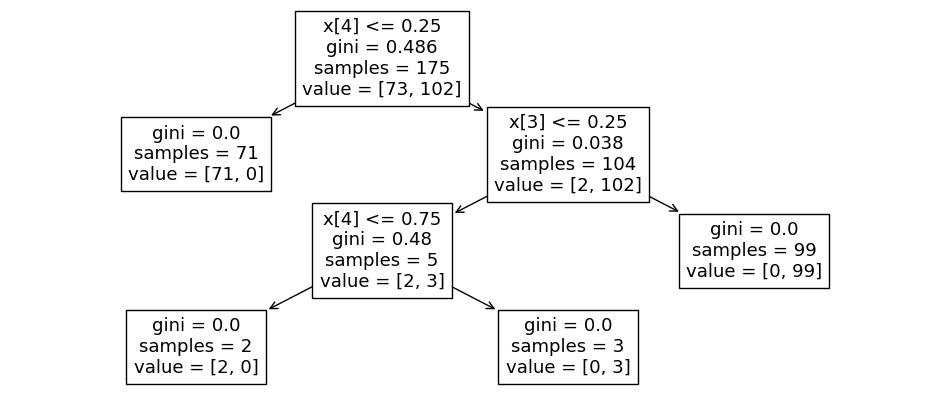

In [ ]:
plt.figure(figsize=(12,5))
tree.plot_tree(DT1);

In [ ]:
y_pred = DT1.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0])

In [ ]:
pd.Series(y_pred).value_counts()

1    40
0    35
dtype: int64

In [ ]:
pd.Series(y_test).value_counts()

1    41
0    34
Name: class, dtype: int64

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.98      0.99        41

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



We got 99% Accuracy in testing phase.

In [ ]:
# Using ENTROPY
DT2 = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 3, max_depth = 5)
DT2.fit(x_train,y_train)
DT2.score(x_train,y_train)

1.0

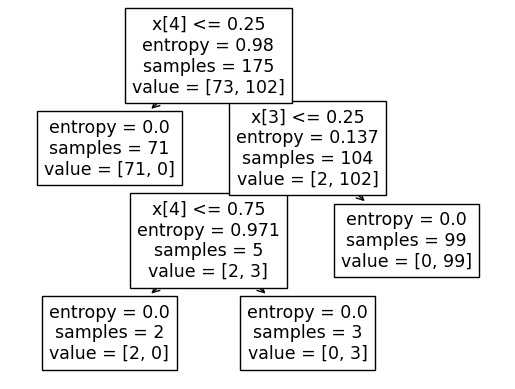

In [ ]:
tree.plot_tree(DT2);

In [ ]:
y_pred = DT2.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.98      0.99        41

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



We got 99% Accuracy.

**3) Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(n_estimators = 100, max_features='auto')
RF.fit(x_train,y_train)

RandomForestClassifier(max_features='auto')

In [ ]:
y_pred= RF.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        41

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



We got 100% Accuracy.

**4) KNN (K NEAREST NEIGHBHORS)**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Performing GridSearchCV to get our best Hyperparameters

n_neighbors = np.array(range(1,50))
param_grid = dict(n_neighbors = n_neighbors)

In [ ]:
KNN1 = KNeighborsClassifier()
grid = GridSearchCV(estimator = KNN1, param_grid= param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.9942857142857143
{'n_neighbors': 5}


The best parameter is 5 neighbors, so we are going to build the model with the above parameters.

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = KNN.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        41

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



By choosing the Best HyperParameters we built a model that provides 100% Accuracy.

5) NAIVE BAYES

In Naive Bayes there are many classifier models, from all of those we chose these 3 models: MultinomialNB, Categorical NB, BernoulliNB and we will build the models in a chronological order.

In [ ]:
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, BernoulliNB

In [ ]:
NB1 = MultinomialNB()
NB1.fit(x_train, y_train)
y_pred = NB1.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       0.95      1.00      0.98        41

    accuracy                           0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75



We got 97% Accuracy in this model.

In [ ]:
NB2 = CategoricalNB()
NB2.fit(x_train, y_train)
y_pred = NB2.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        34
           1       1.00      0.90      0.95        41

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



We got 95% Accuracy in this.

In [ ]:
NB3 = BernoulliNB()
NB3.fit(x_train, y_train)
y_pred = NB3.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        41

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



we got 100% Accuracy in this model.

6) SVM (Support Vector Machine)

In [ ]:
from sklearn.svm import SVC

We will use GridSearchCV for getting the best Hyperparametrs to build a good model which gives best Accuracy.

In [ ]:
clf = SVC()
param_grid = [{'kernel':['linear','rbf'], 'gamma':[0.5,0.1,0.01], 'C':[10,5,4,3,2,1,0.1,0.01,0.001]}]
gsv = GridSearchCV(clf, param_grid = param_grid, cv=5)
gsv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [10, 5, 4, 3, 2, 1, 0.1, 0.01, 0.001],
                          'gamma': [0.5, 0.1, 0.01],
                          'kernel': ['linear', 'rbf']}])

In [ ]:
gsv.best_params_, gsv.best_score_

({'C': 10, 'gamma': 0.5, 'kernel': 'linear'}, 0.9942857142857143)

We got our best Hyperparameters and using these values we will build our SVM model.

In [ ]:
SVM = SVC(kernel = 'linear', gamma = 0.5, C=10)
SVM.fit(x_train,y_train)

SVC(C=10, gamma=0.5, kernel='linear')

In [ ]:
y_pred = SVM.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.98      0.99        41

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



We got 99% Accuracy here.

Now we will create a Dictionary of the models and thier respective Accuracies.

In [ ]:
dict = [{'Models': 'Logistic Regression', 'Accuracy': '100%'},
        {'Models': 'Decision Tree(Gini)', 'Accuracy': '99%'},
        {'Models': 'Decision Tree(Entropy)', 'Accuracy': '99%'},
        {'Models': 'Random Forest', 'Accuracy': '100%'},
        {'Models': 'KNN', 'Accuracy': '100%'},
        {'Models': 'Naive Bayes(Multinomial)', 'Accuracy': '97%'},
        {'Models': 'Naive Bayes(Categorical)', 'Accuracy': '95%'},
        {'Models': 'Naive Bayes(Bernoulli)', 'Accuracy': '100%'},
        {'Models': 'SVM', 'Accuracy': '99%'}]

We wil convert the Dictionary to DataFrame so that we can interpret it easily.

In [ ]:
AccuracyTable = pd.DataFrame(dict)
AccuracyTable

,Models,Accuracy
0,Logistic Regression,100%
1,Decision Tree(Gini),99%
2,Decision Tree(Entropy),99%
3,Random Forest,100%
4,KNN,100%
5,Naive Bayes(Multinomial),97%
6,Naive Bayes(Categorical),95%
7,Naive Bayes(Bernoulli),100%
8,SVM,99%


From the above DatFrame we can see which model gives the highest Accuracy.

Majority of the models are giving 100% Accuracy as the data is very less. For the Deployment part we will Random Forest as it avoids overfitting. Before deployment of the model, we will rebuild the model with the full data.

In [ ]:
finalmodel = RandomForestClassifier(n_estimators = 100, max_features='auto')
finalmodel.fit(x,y)

RandomForestClassifier(max_features='auto')

In [ ]:
y_pred = finalmodel.predict(x)

In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       143

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



***DEPLOYMENT***